In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-12-04 07:23:34--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-04 07:23:34--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-04 07:23:34--  http://netactuate.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving netactuat

In [2]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '14tq-d8l_JLtQkZDCDBMSq-WQ-vDkUd4t'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_M30.csv') 
# df =  pd.read_csv('AUD_CAD_M15.csv')

id = '12p2owDfxmtYEuYo0QbLzYArPVJZHqwBp'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_M15.csv')

id = '1RhrCpSvr3rBAWL6WVebi1WWOcoj9yLn9'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_H4.csv')

id = '1e_CDKiWaVSrWkCVbFyy6fSmo_GsF7YoA'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_CAD_H1.csv')



# Dataset fill

## 15M

In [4]:
dataset_M15 = pd.read_csv('AUD_CAD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 19:45:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 20:15:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 20:45:00+00:00',
               '2005-01-02 21:00:00+00:00', '2005-01-02 21:15:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417932, freq=None)

In [5]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [6]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [7]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [8]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [9]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [10]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93874,0.93910
1,2005-01-02 21:15:00+00:00,0.93874,0.93874,0.93822,0.93848
2,2005-01-02 21:30:00+00:00,0.93840,0.93858,0.93822,0.93858
3,2005-01-02 21:45:00+00:00,0.93848,0.93892,0.93848,0.93858
4,2005-01-02 22:00:00+00:00,0.93874,0.93910,0.93830,0.93830
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.91522,0.91575,0.91464,0.91574
418652,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91586
418653,2021-07-30 20:15:00+00:00,0.91588,0.91596,0.91550,0.91551
418654,2021-07-30 20:30:00+00:00,0.91552,0.91554,0.91490,0.91551


In [11]:
np.any(ful_data_M15.isnull())

False

## 30M

In [12]:
dataset_M30 = pd.read_csv('AUD_CAD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209730, freq=None)

In [13]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [14]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [15]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [16]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [17]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [18]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93822,0.93848
1,2005-01-02 21:30:00+00:00,0.93840,0.93892,0.93822,0.93858
2,2005-01-02 22:00:00+00:00,0.93874,0.93910,0.93813,0.93892
3,2005-01-02 22:30:00+00:00,0.93936,0.94007,0.93910,0.94007
4,2005-01-02 23:00:00+00:00,0.94016,0.94158,0.93980,0.94158
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.91582,0.91587,0.91528,0.91540
209324,2021-07-30 19:00:00+00:00,0.91538,0.91558,0.91510,0.91528
209325,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574
209326,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551


## 1H

In [19]:
dataset_H1 = pd.read_csv('AUD_CAD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105546, freq=None)

In [20]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [21]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [22]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [23]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [24]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [25]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.93936,0.93936,0.93822,0.93858
1,2005-01-02 22:00:00+00:00,0.93874,0.94007,0.93813,0.94007
2,2005-01-02 23:00:00+00:00,0.94016,0.94193,0.93980,0.94051
3,2005-01-03 00:00:00+00:00,0.94069,0.94104,0.93919,0.94016
4,2005-01-03 01:00:00+00:00,0.94020,0.94198,0.94002,0.94074
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.91636,0.91678,0.91601,0.91610
104660,2021-07-30 17:00:00+00:00,0.91611,0.91624,0.91528,0.91600
104661,2021-07-30 18:00:00+00:00,0.91600,0.91612,0.91528,0.91540
104662,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574


# TA indicator

In [26]:
import talib as ta


def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close,timeperiod=timeperiod)


    return data

#AUD_CAD_H1 data scale

In [27]:
df = ful_data_H1

In [28]:
df = df.tail(20000).reset_index(drop=True)


In [29]:
data = get_technical_indicators(df)
data = data.iloc[30:,:].reset_index(drop=True)
data

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
1,2018-06-01 17:00:00+00:00,0.98052,0.98154,0.98036,0.98144,0.979101,0.979083,0.978930,0.978349,0.980767,0.978349,0.978665,1.003702,0.979880,0.978035,0.980605,0.981106
2,2018-06-01 18:00:00+00:00,0.98145,0.98209,0.98112,0.98168,0.979707,0.979555,0.979050,0.978759,0.981517,0.978759,0.979090,1.004194,0.980593,0.978618,0.981602,0.982233
3,2018-06-01 19:00:00+00:00,0.98169,0.98195,0.98070,0.98096,0.980107,0.979811,0.979150,0.979213,0.981641,0.979213,0.979434,1.004650,0.980869,0.979245,0.981894,0.982490
4,2018-06-01 20:00:00+00:00,0.98095,0.98211,0.98024,0.98032,0.980308,0.979903,0.979150,0.979507,0.981381,0.979507,0.979520,1.003008,0.980845,0.979804,0.981910,0.982444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.91636,0.91678,0.91601,0.91610,0.916750,0.917220,0.917860,0.917331,0.915880,0.917331,0.917985,0.997387,0.916037,0.917054,0.915589,0.915201
19966,2021-07-30 17:00:00+00:00,0.91611,0.91624,0.91528,0.91600,0.916508,0.916999,0.917860,0.916999,0.915748,0.916999,0.917724,0.996389,0.915849,0.916730,0.915527,0.915199
19967,2021-07-30 18:00:00+00:00,0.91600,0.91612,0.91528,0.91540,0.916217,0.916708,0.917060,0.916559,0.915423,0.916559,0.917247,0.995216,0.915529,0.916490,0.915534,0.915307
19968,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574,0.916069,0.916532,0.916265,0.916261,0.915394,0.916261,0.917052,0.996756,0.915424,0.916322,0.915684,0.915555


In [30]:

data_H1_ali = data
for i in range(3):
  data_H1_ali = data_H1_ali.append(data)
data_H1_ali = data_H1_ali.sort_values(by = 'datetime')
data_H1_ali = data_H1_ali.reset_index()
data_H1_ali = data_H1_ali.drop(labels='index',axis=1)

In [31]:
data_H1_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
1,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
2,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
3,2018-06-01 16:00:00+00:00,0.97940,0.98060,0.97927,0.98051,0.978473,0.978559,0.978465,0.977987,0.979746,0.977987,0.978305,1.003798,0.979009,0.977608,0.979445,0.979769
4,2018-06-01 17:00:00+00:00,0.98052,0.98154,0.98036,0.98144,0.979101,0.979083,0.978930,0.978349,0.980767,0.978349,0.978665,1.003702,0.979880,0.978035,0.980605,0.981106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:00:00+00:00,0.91538,0.91575,0.91464,0.91574,0.916069,0.916532,0.916265,0.916261,0.915394,0.916261,0.917052,0.996756,0.915424,0.916322,0.915684,0.915555
79876,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635
79877,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635
79878,2021-07-30 20:00:00+00:00,0.91575,0.91626,0.91490,0.91606,0.916032,0.916446,0.916265,0.916181,0.915553,0.916181,0.917023,0.999127,0.915469,0.916198,0.915734,0.915635


## y scale

In [32]:
def y_size_scale(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [33]:
num_point = 17
pred_point = 4

fake_y, real_y = y_size_scale(data_H1_ali['close'],num_point, pred_point)
H1_max_y_rows = fake_y.max(axis=1)

# fake_scaled_unshape = fake / max_of_fake_rows[:, np.newaxis]
real_scaled_unshape = real_y/H1_max_y_rows[:, np.newaxis]


# real_scaled = real_scaled_unshape.reshape((real_scaled_unshape.shape[0],1,real_scaled_unshape.shape[1]))
# fake_scaled = fake_scaled_unshape.reshape((fake_scaled_unshape.shape[0],1,fake_scaled_unshape.shape[1]))

In [34]:
fake_y.shape

(79860, 17)

In [35]:
real_y.shape

(79860, 4)

In [36]:
print(real_scaled_unshape.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## Feature

In [37]:
def feature_scale(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [38]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_H1_ali]
feature_tem = np.zeros((real_scaled_unshape.shape[0], data_H1_ali.shape[1] - 1, num_point))
feature_tem.shape

(79860, 16, 17)

In [39]:
for i in range(data_H1_ali.shape[1] - 1):
  
  feature_fake = feature_scale(data_H1_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows = feature_fake.max(axis=1)
  fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
  feature_tem[:,i,:] = fake_scaled_unshape


In [40]:
feature_tem_top4 = feature_tem[:,:4,:]

In [41]:
np.savez('AUD_CAD_H1', AUD_CAD_H1_feature = feature_tem, AUD_CAD_H1_y = real_scaled_unshape)
np.savez('AUD_CAD_H1_top4', AUD_CAD_H1_feature_top4 = feature_tem_top4)

In [42]:
data1 = np.load('AUD_CAD_H1.npz')
data2 = np.load('AUD_CAD_H1_top4.npz')

In [43]:
data1['AUD_CAD_H1_feature'].shape

(79860, 16, 17)

In [44]:
data2['AUD_CAD_H1_feature_top4'].shape

(79860, 4, 17)

In [45]:
data1['AUD_CAD_H1_y'].shape

(79860, 4)

# AUD_CAD_30M data scale

In [46]:
df_30m = ful_data_M30

In [47]:
df_30m = df_30m.tail(40000).reset_index(drop=True)

In [48]:
data_30m = get_technical_indicators(df_30m)
data_30m = data_30m.iloc[60:,:].reset_index(drop=True)
data_30m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
1,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
2,2018-06-01 17:00:00+00:00,0.98052,0.98106,0.98036,0.98098,0.979719,0.979376,0.978930,0.979112,0.980895,0.979112,0.979413,1.003427,0.980381,0.979201,0.980932,0.981337
3,2018-06-01 17:30:00+00:00,0.98098,0.98154,0.98049,0.98144,0.980142,0.979751,0.979500,0.979568,0.981403,0.979568,0.980247,1.004668,0.980881,0.979567,0.981290,0.981673
4,2018-06-01 18:00:00+00:00,0.98145,0.98209,0.98114,0.98207,0.980597,0.980173,0.979985,0.980019,0.981983,0.980019,0.980996,1.004614,0.981442,0.979934,0.981753,0.982138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.91582,0.91587,0.91528,0.91540,0.915913,0.916046,0.916265,0.916073,0.915582,0.916073,0.916616,0.999061,0.915492,0.916122,0.915593,0.915487
39936,2021-07-30 19:00:00+00:00,0.91538,0.91558,0.91510,0.91528,0.915769,0.915907,0.916205,0.916015,0.915402,0.916015,0.916591,0.999367,0.915339,0.915985,0.915277,0.915113
39937,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574,0.915719,0.915877,0.915880,0.915876,0.915503,0.915876,0.916528,0.998484,0.915387,0.915851,0.915405,0.915300
39938,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240


In [49]:

data_30m_ali = data_30m
for i in range(1):
  data_30m_ali = data_30m_ali.append(data_30m)
data_30m_ali = data_30m_ali.sort_values(by = 'datetime')
data_30m_ali = data_30m_ali.reset_index()
data_30m_ali = data_30m_ali.drop(labels='index',axis=1)

In [50]:
data_30m_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
1,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97927,0.97968,0.978932,0.978688,0.978150,0.978388,0.979890,0.978388,0.978517,1.003277,0.979423,0.978448,0.980021,0.980384
2,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
3,2018-06-01 16:30:00+00:00,0.97966,0.98060,0.97950,0.98051,0.979318,0.979020,0.978695,0.978777,0.980387,0.978777,0.978983,1.003983,0.979892,0.978843,0.980401,0.980761
4,2018-06-01 17:00:00+00:00,0.98052,0.98106,0.98036,0.98098,0.979719,0.979376,0.978930,0.979112,0.980895,0.979112,0.979413,1.003427,0.980381,0.979201,0.980932,0.981337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:30:00+00:00,0.91528,0.91575,0.91464,0.91574,0.915719,0.915877,0.915880,0.915876,0.915503,0.915876,0.916528,0.998484,0.915387,0.915851,0.915405,0.915300
79876,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240
79877,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91551,0.915652,0.915810,0.915880,0.915807,0.915478,0.915807,0.916491,0.999247,0.915355,0.915757,0.915343,0.915240
79878,2021-07-30 20:30:00+00:00,0.91552,0.91626,0.91490,0.91606,0.915698,0.915855,0.915880,0.915779,0.915719,0.915779,0.916486,0.999694,0.915520,0.915679,0.915537,0.915483


## y_scale

In [51]:
num_point = 17
pred_point = 4

fake_y_30m, real_y_30m = y_size_scale(data_30m_ali['close'], num_point, pred_point)
max_y_rows_30m = fake_y_30m.max(axis=1)


real_scaled_unshape_30m = real_y_30m/max_y_rows_30m[:, np.newaxis]



In [52]:
print(real_scaled_unshape_30m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature_scale

In [53]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_30m_ali]
feature_tem_30m = np.zeros((real_scaled_unshape_30m.shape[0], data_30m_ali.shape[1] - 1, num_point))
feature_tem_30m.shape

(79860, 16, 17)

In [54]:
for i in range(data_30m.shape[1] - 1):
  
  feature_fake_30m = feature_scale(data_30m_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_30m = feature_fake_30m.max(axis=1)
  fake_scaled_unshape_30m = feature_fake_30m / max_feature_rows_30m[:, np.newaxis]
  feature_tem_30m[:,i,:] = fake_scaled_unshape_30m

In [55]:
feature_tem_30m_top4 = feature_tem_30m[:,:4,:]

In [56]:
np.savez('AUD_CAD_m30', AUD_CAD_m30_feature = feature_tem_30m, AUD_CAD_30m_y = real_scaled_unshape_30m)
np.savez('AUD_CAD_m30_top4', AUD_CAD_m30_feature_top4 = feature_tem_30m_top4)

In [57]:
data3 = np.load('AUD_CAD_m30.npz')
data4 = np.load('AUD_CAD_m30_top4.npz')

In [58]:
data3['AUD_CAD_m30_feature'].shape

(79860, 16, 17)

In [59]:
data4['AUD_CAD_m30_feature_top4'].shape

(79860, 4, 17)

In [60]:
data3['AUD_CAD_30m_y'].shape

(79860, 4)

# AUD_CAD_15M data scale

In [61]:
df_15m = ful_data_M15

In [62]:
df_15m = df_15m.tail(80000).reset_index(drop=True)

In [63]:
data_15m = get_technical_indicators(df_15m)
data_15m = data_15m.iloc[120:,:].reset_index(drop=True)
data_15m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.97940,0.97986,0.97940,0.97962,0.979273,0.978992,0.978760,0.979054,0.979709,0.979054,0.978798,1.002046,0.979616,0.979155,0.979710,0.979855
1,2018-06-01 16:15:00+00:00,0.97962,0.97978,0.97927,0.97968,0.979386,0.979117,0.978905,0.979232,0.979797,0.979232,0.978912,1.001820,0.979730,0.979270,0.979695,0.979798
2,2018-06-01 16:30:00+00:00,0.97966,0.98002,0.97954,0.97958,0.979450,0.979201,0.979370,0.979377,0.979791,0.979377,0.978977,1.001482,0.979771,0.979346,0.979595,0.979643
3,2018-06-01 16:45:00+00:00,0.97957,0.98060,0.97950,0.98051,0.979656,0.979439,0.979785,0.979493,0.980191,0.979493,0.979099,1.001184,0.980100,0.979425,0.979981,0.980089
4,2018-06-01 17:00:00+00:00,0.98052,0.98100,0.98044,0.98054,0.979846,0.979639,0.979800,0.979641,0.980454,0.979641,0.979291,1.001512,0.980344,0.979551,0.980256,0.980393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:45:00+00:00,0.91522,0.91575,0.91464,0.91574,0.915519,0.915608,0.915630,0.915625,0.915404,0.915625,0.915890,1.000350,0.915384,0.915580,0.915306,0.915235
79876,2021-07-30 20:00:00+00:00,0.91575,0.91620,0.91540,0.91586,0.915561,0.915653,0.915630,0.915625,0.915588,0.915625,0.915890,1.000000,0.915508,0.915520,0.915434,0.915392
79877,2021-07-30 20:15:00+00:00,0.91588,0.91596,0.91550,0.91551,0.915541,0.915627,0.915630,0.915576,0.915557,0.915576,0.915870,0.999465,0.915487,0.915481,0.915470,0.915446
79878,2021-07-30 20:30:00+00:00,0.91552,0.91554,0.91490,0.91551,0.915529,0.915606,0.915550,0.915525,0.915537,0.915525,0.915849,0.999443,0.915474,0.915472,0.915536,0.915538


## y_scale

In [64]:
num_point = 17
pred_point = 4

fake_y_15m, real_y_15m = y_size_scale(data_15m['close'], num_point, pred_point)
max_y_rows_15m = fake_y_15m.max(axis=1)


real_scaled_unshape_15m = real_y_15m/max_y_rows_15m[:, np.newaxis]


In [65]:
print(real_scaled_unshape_15m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature

In [66]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_15m]
feature_tem_15m = np.zeros((real_scaled_unshape_15m.shape[0],data_15m.shape[1] - 1,num_point))
feature_tem_15m.shape

(79860, 16, 17)

In [67]:
for i in range(data_15m.shape[1] - 1):
  
  feature_fake_15m = feature_scale(data_15m[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_15m = feature_fake_15m.max(axis=1)
  fake_scaled_unshape_15m = feature_fake_15m / max_feature_rows_15m[:, np.newaxis]
  feature_tem_15m[:,i,:] = fake_scaled_unshape_15m

In [68]:
feature_tem_15m_top4 = feature_tem_15m[:,:4,:]

In [69]:
np.savez('AUD_CAD_m15', AUD_CAD_m15_feature = feature_tem_15m, AUD_CAD_15m_y = real_scaled_unshape_15m)
np.savez('AUD_CAD_m15_top4', AUD_CAD_m15_feature_top4 = feature_tem_15m_top4)

In [70]:
data5 = np.load('AUD_CAD_m15.npz')
data6 = np.load('AUD_CAD_m15_top4.npz')

In [71]:
data5['AUD_CAD_m15_feature'].shape

(79860, 16, 17)

In [72]:
data6['AUD_CAD_m15_feature_top4'].shape

(79860, 4, 17)

# Split data

## AUD_CAD_H1 split data

In [73]:
def split_train_test(data):
    train_size = round(data.shape[0] * 0.7)
    valid_size = round(data.shape[0] * 0.15)
    data_train = data[0:train_size]
    data_valid = data[train_size: train_size + valid_size]
    data_test = data[train_size + valid_size:]
    return data_train, data_valid, data_test

In [74]:
data_H1 = np.load('AUD_CAD_H1.npz')
data_H1_top4 = np.load('AUD_CAD_H1_top4.npz')

In [75]:
H1_X = data_H1['AUD_CAD_H1_feature']
H1_X_top4 = data_H1_top4['AUD_CAD_H1_feature_top4']

In [76]:
H1_y = data_H1['AUD_CAD_H1_y']

In [77]:
# H1_x_trans = np.zeros((H1_X.shape[0], H1_X.shape[1], 18))

# for i in range(H1_X.shape[0]):
#   H1_x_trans[i, :, :-1] = H1_X[i]
#   H1_x_trans[i, :, -1] = H1_X[i, :, -1]

In [78]:
train_H1_X, valid_H1_X, test_H1_X = split_train_test(H1_X)
train_H1_X_top4, valid_H1_X_top4, test_H1_X_top4 = split_train_test(H1_X_top4)
train_H1_y, valid_H1_y, test_H1_y = split_train_test(H1_y)

In [79]:
print(train_H1_X.shape)
print(valid_H1_X.shape)
print(test_H1_X.shape)
print(train_H1_X_top4.shape)
print(valid_H1_X_top4.shape)
print(test_H1_X_top4.shape)
print(train_H1_y.shape)
print(valid_H1_y.shape)
print(test_H1_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_CAD_M30 split data

In [80]:
data_m30 = np.load('AUD_CAD_m30.npz')
data_m30_top4 = np.load('AUD_CAD_m30_top4.npz')
m30_X = data_m30['AUD_CAD_m30_feature']
m30_X_top4 = data_m30_top4['AUD_CAD_m30_feature_top4']
m30_y = data_m30['AUD_CAD_30m_y']

In [81]:
# m30_x_trans = np.zeros((m30_X.shape[0], m30_X.shape[1], 18))

# for i in range(m30_X.shape[0]):
#   m30_x_trans[i, :, :-1] = m30_X[i]
#   m30_x_trans[i, :, -1] = m30_X[i, :, -1]

In [82]:
train_m30_X, valid_m30_X, test_m30_X = split_train_test(m30_X)
train_m30_X_top4, valid_m30_X_top4, test_m30_X_top4 = split_train_test(m30_X_top4)
train_m30_y, valid_m30_y, test_m30_y = split_train_test(m30_y)

In [83]:
print(train_m30_X.shape)
print(valid_m30_X.shape)
print(test_m30_X.shape)
print(train_m30_X_top4.shape)
print(valid_m30_X_top4.shape)
print(test_m30_X_top4.shape)
print(train_m30_y.shape)
print(valid_m30_y.shape)
print(test_m30_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_CAD_M15 split data

In [84]:
data_m15 = np.load('AUD_CAD_m15.npz')
data_m15_top4 = np.load('AUD_CAD_m15_top4.npz')
m15_X = data_m15['AUD_CAD_m15_feature']
m15_X_top4 = data_m15_top4['AUD_CAD_m15_feature_top4']
m15_y = data_m15['AUD_CAD_15m_y']

In [85]:
# m15_x_trans = np.zeros((m15_X.shape[0], m15_X.shape[1], 18))

# for i in range(m15_X.shape[0]):
#   m15_x_trans[i, :, :-1] = m15_X[i]
#   m15_x_trans[i, :, -1] = m15_X[i, :, -1]

In [86]:
train_m15_X, valid_m15_X, test_m15_X = split_train_test(m15_X)
train_m15_X_top4, valid_m15_X_top4, test_m15_X_top4 = split_train_test(m15_X_top4)
train_m15_y, valid_m15_y, test_m15_y = split_train_test(m15_y)

In [87]:
print(train_m15_X.shape)
print(valid_m15_X.shape)
print(test_m15_X.shape)
print(train_m15_X_top4.shape)
print(valid_m15_X_top4.shape)
print(test_m15_X_top4.shape)
print(train_m15_y.shape)
print(valid_m15_y.shape)
print(test_m15_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


# Functional API

## API test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras_self_attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=8ea6940381a6047c58fef87809385b44aabd7bd3191bc6ebb78a1061bccdadad
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.embeddings import Embedding
from tensorflow.keras import Input

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads, dff, rate=0.1):
    super(EncoderLayer, self).__init__()

    self.mha = MultiHeadAttention(d_model, num_heads)
    self.ffn = point_wise_feed_forward_network(d_model, dff)

    self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
    self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

    self.dropout1 = tf.keras.layers.Dropout(rate)
    self.dropout2 = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):

    attn_output, _ = self.mha(x, x, x, mask)  # (batch_size, input_seq_len, d_model)
    attn_output = self.dropout1(attn_output, training=training)

    out1 = self.layernorm1(x + attn_output)  # (batch_size, input_seq_len, d_model)

    ffn_output = self.ffn(out1)  # (batch_size, input_seq_len, d_model)
    ffn_output = self.dropout2(ffn_output, training=training)
    out2 = self.layernorm2(out1 + ffn_output)  # (batch_size, input_seq_len, d_model)

    return out2

In [ ]:
def point_wise_feed_forward_network(d_model, dff):
  return tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),  # (batch_size, seq_len, dff)
      tf.keras.layers.Dense(d_model)  # (batch_size, seq_len, d_model)
  ])

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
  def __init__(self, d_model, num_heads):
    super(MultiHeadAttention, self).__init__()
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.wq = tf.keras.layers.Dense(d_model)
    self.wk = tf.keras.layers.Dense(d_model)
    self.wv = tf.keras.layers.Dense(d_model)

    self.dense = tf.keras.layers.Dense(d_model)

  def split_heads(self, x, batch_size):
    """Split the last dimension into (num_heads, depth).
    Transpose the result such that the shape is (batch_size, num_heads, seq_len, depth)
    """
    x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(x, perm=[0, 2, 1, 3])

  def call(self, v, k, q, mask):
    batch_size = tf.shape(q)[0]

    q = self.wq(q)  # (batch_size, seq_len, d_model)
    k = self.wk(k)  # (batch_size, seq_len, d_model)
    v = self.wv(v)  # (batch_size, seq_len, d_model)

    q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
    k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
    v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

    # scaled_attention.shape == (batch_size, num_heads, seq_len_q, depth)
    # attention_weights.shape == (batch_size, num_heads, seq_len_q, seq_len_k)
    scaled_attention, attention_weights = scaled_dot_product_attention(
        q, k, v, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # (batch_size, seq_len_q, num_heads, depth)

    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))  # (batch_size, seq_len_q, d_model)

    output = self.dense(concat_attention)  # (batch_size, seq_len_q, d_model)

    return output, attention_weights

In [ ]:
def create_padding_mask(seq):
  seq = tf.cast(tf.math.equal(seq, 0), tf.float32)

  # add extra dimensions to add the padding
  # to the attention logits.
  return seq[:, tf.newaxis, tf.newaxis, :]  # (batch_size, 1, 1, seq_len)

In [ ]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [ ]:
def scaled_dot_product_attention(q, k, v, mask):
  """Calculate the attention weights.
  q, k, v must have matching leading dimensions.
  k, v must have matching penultimate dimension, i.e.: seq_len_k = seq_len_v.
  The mask has different shapes depending on its type(padding or look ahead)
  but it must be broadcastable for addition.

  Args:
    q: query shape == (..., seq_len_q, depth)
    k: key shape == (..., seq_len_k, depth)
    v: value shape == (..., seq_len_v, depth_v)
    mask: Float tensor with shape broadcastable
          to (..., seq_len_q, seq_len_k). Defaults to None.

  Returns:
    output, attention_weights
  """

  matmul_qk = tf.matmul(q, k, transpose_b=True)  # (..., seq_len_q, seq_len_k)

  # scale matmul_qk
  dk = tf.cast(tf.shape(k)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # add the mask to the scaled tensor.
  if mask is not None:
    scaled_attention_logits += (mask * -1e9)

  # softmax is normalized on the last axis (seq_len_k) so that the scores
  # add up to 1.
  attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)  # (..., seq_len_q, seq_len_k)

  output = tf.matmul(attention_weights, v)  # (..., seq_len_q, depth_v)

  return output, attention_weights

In [ ]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
               maximum_position_encoding, rate=0.1):
    super(Encoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    # self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
    self.pos_encoding = positional_encoding(maximum_position_encoding,
                                            self.d_model)

    self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate)
                       for _ in range(num_layers)]

    self.dropout = tf.keras.layers.Dropout(rate)

  def call(self, x, training, mask):
    x = tf.reshape(x,[-1,17,16])

    seq_len = tf.shape(x)[1]

    # adding embedding and position encoding.
    # x = self.embedding(x)  # (batch_size, input_seq_len, d_model)
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))

    x += self.pos_encoding[:, :seq_len, :]

    x = self.dropout(x, training=training)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x, training, mask)

    return x  # (batch_size, input_seq_len, d_model)

In [ ]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [ ]:
def positional_encoding(position, d_model):
  angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                          np.arange(d_model)[np.newaxis, :],
                          d_model)

  # apply sin to even indices in the array; 2i
  angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

  # apply cos to odd indices in the array; 2i+1
  angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

  pos_encoding = angle_rads[np.newaxis, ...]

  return tf.cast(pos_encoding, dtype=tf.float32)

In [ ]:
input_shape_H1=(16, 17)
input_shape_M30=(16, 17)
input_shape_M15=(16, 17)
output_dim = 4
inp_H1 = keras.Input(shape=input_shape_H1, name='X_H1')

x_H1 = Encoder(3,16,1,200,3,17)(inp_H1, True, None)

# encoderH1  =  encoder1(inp_H1, True, None)
x_H1 = Flatten()(x_H1)
x_H1 = Dense(128)(x_H1)

inp_M30 = keras.Input(shape=input_shape_M30, name='X_M30')
x_M30 = Encoder(3,16,1,200,3,17)(inp_M30, True, None)

# encoderM30  =  encoder2(inp_M30, True, None)
x_M30 = Flatten()(x_M30)
x_M30 = Dense(128)(x_M30)

inp_M15 = Input(shape=input_shape_M15, name='X_M15')
x_M15 = Encoder(3,16,1,200,3,17)(inp_M15,True,None)

# encoderM15  =  encoder3(inp_M15, True, None)
x_M15 = Flatten()(x_M15)
x_M15 = Dense(128)(x_M15)

x = layers.concatenate([x_H1, x_M30, x_M15])

x = Dense(256)(x)
x = Dense(128)(x)
out = Dense(units=output_dim, name="priority")(x)

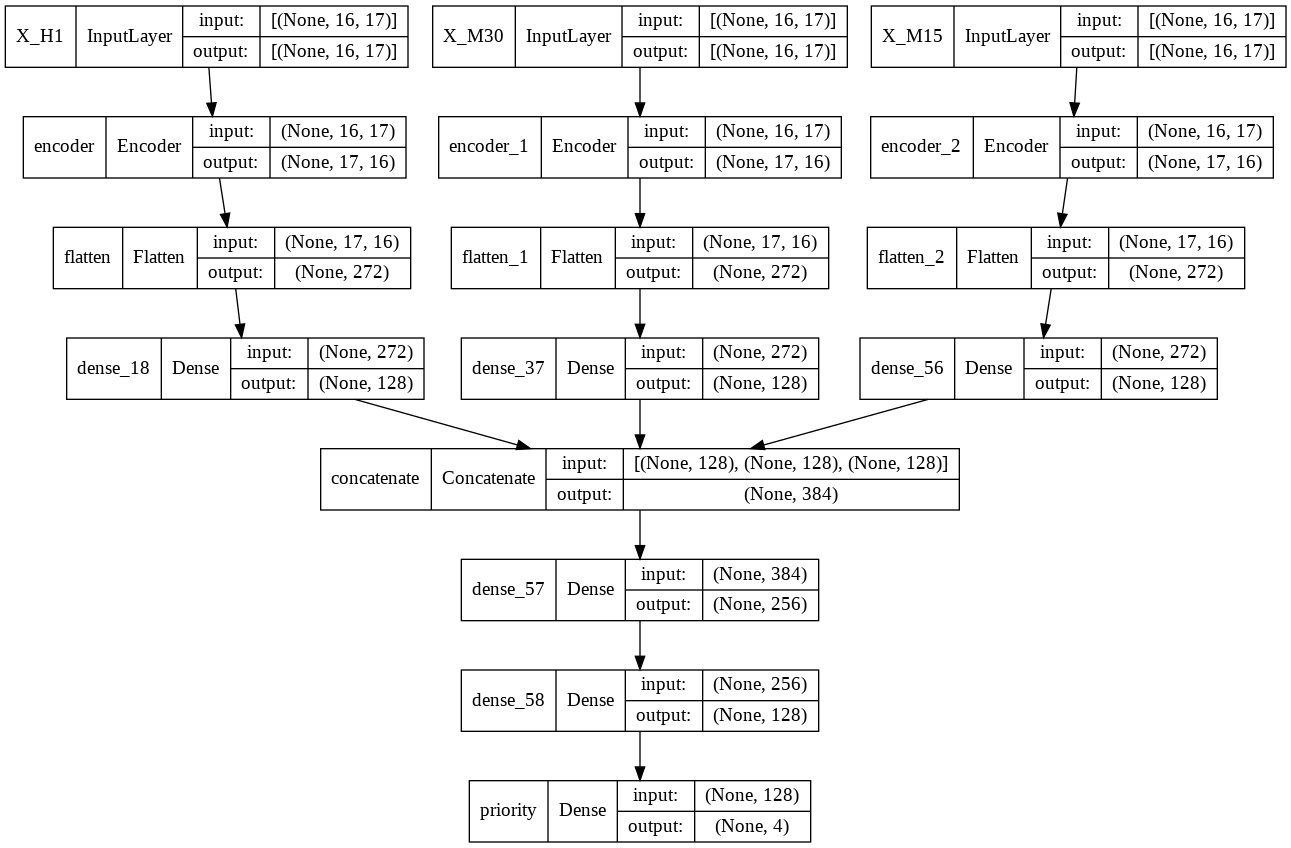

In [ ]:
from keras.layers.embeddings import Embedding
model2 = keras.Model(inputs=[inp_H1, inp_M30, inp_M15], outputs=[out])
keras.utils.plot_model(model2, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model2.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss={"priority": 'mean_squared_error',}
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = os.path.join(r'/content/checkpoint/model_{epoch:03d}', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=20, min_delta=1e-8)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                        min_delta=1e-8, cooldown=1, min_lr=1e-5)
mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min') 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model2.fit(
    {"X_H1": train_H1_X, "X_M30": train_m30_X, "X_M15": train_m15_X},{"priority": train_m15_y},
    epochs=100,
    batch_size=128,
    validation_data=({"X_H1": valid_H1_X, "X_M30": valid_m30_X, "X_M15": valid_m15_X}, {"priority": valid_m15_y}),
    callbacks=[mcp, rlp, es]
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
437/437 [==============================] - ETA: 0s - loss: 0.2787
Epoch 00001: val_loss improved from inf to 0.00522, saving model to /content/checkpoint/model_001/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


437/437 [==============================] - 155s 351ms/step - loss: 0.2787 - val_loss: 0.0052 - lr: 0.0010
Epoch 2/100
437/437 [==============================] - ETA: 0s - loss: 0.0029
Epoch 00002: val_loss improved from 0.00522 to 0.00149, saving model to /content/checkpoint/model_002/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


437/437 [==============================] - 156s 357ms/step - loss: 0.0029 - val_loss: 0.0015 - lr: 0.0010
Epoch 3/100
437/437 [==============================] - ETA: 0s - loss: 0.0011
Epoch 00003: val_loss improved from 0.00149 to 0.00146, saving model to /content/checkpoint/model_003/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 0.0011 - val_loss: 0.0015 - lr: 0.0010
Epoch 4/100
437/437 [==============================] - ETA: 0s - loss: 6.0789e-04
Epoch 00004: val_loss improved from 0.00146 to 0.00042, saving model to /content/checkpoint/model_004/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 6.0789e-04 - val_loss: 4.1802e-04 - lr: 0.0010
Epoch 5/100
437/437 [==============================] - ETA: 0s - loss: 4.8684e-04
Epoch 00005: val_loss improved from 0.00042 to 0.00025, saving model to /content/checkpoint/model_005/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_005/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_005/best_model_keras/assets


437/437 [==============================] - 153s 351ms/step - loss: 4.8684e-04 - val_loss: 2.5076e-04 - lr: 0.0010
Epoch 6/100
437/437 [==============================] - ETA: 0s - loss: 3.7406e-04
Epoch 00006: val_loss improved from 0.00025 to 0.00022, saving model to /content/checkpoint/model_006/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_006/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_006/best_model_keras/assets


437/437 [==============================] - 153s 350ms/step - loss: 3.7406e-04 - val_loss: 2.1802e-04 - lr: 0.0010
Epoch 7/100
437/437 [==============================] - ETA: 0s - loss: 3.2224e-04
Epoch 00007: val_loss improved from 0.00022 to 0.00012, saving model to /content/checkpoint/model_007/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_007/best_model_keras/assets


437/437 [==============================] - 153s 350ms/step - loss: 3.2224e-04 - val_loss: 1.2443e-04 - lr: 0.0010
Epoch 8/100
437/437 [==============================] - ETA: 0s - loss: 2.6381e-04
Epoch 00008: val_loss did not improve from 0.00012
437/437 [==============================] - 108s 247ms/step - loss: 2.6381e-04 - val_loss: 1.2472e-04 - lr: 0.0010
Epoch 9/100
437/437 [==============================] - ETA: 0s - loss: 1.9170e-04
Epoch 00009: val_loss improved from 0.00012 to 0.00011, saving model to /content/checkpoint/model_009/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_009/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_009/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 1.9170e-04 - val_loss: 1.1053e-04 - lr: 0.0010
Epoch 10/100
437/437 [==============================] - ETA: 0s - loss: 1.8373e-04
Epoch 00010: val_loss did not improve from 0.00011
437/437 [==============================] - 109s 250ms/step - loss: 1.8373e-04 - val_loss: 1.2359e-04 - lr: 0.0010
Epoch 11/100
437/437 [==============================] - ETA: 0s - loss: 1.7310e-04
Epoch 00011: val_loss improved from 0.00011 to 0.00009, saving model to /content/checkpoint/model_011/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_011/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_011/best_model_keras/assets


437/437 [==============================] - 152s 349ms/step - loss: 1.7310e-04 - val_loss: 9.4123e-05 - lr: 0.0010
Epoch 12/100
437/437 [==============================] - ETA: 0s - loss: 1.3185e-04
Epoch 00012: val_loss did not improve from 0.00009
437/437 [==============================] - 108s 247ms/step - loss: 1.3185e-04 - val_loss: 1.6820e-04 - lr: 0.0010
Epoch 13/100
437/437 [==============================] - ETA: 0s - loss: 1.3372e-04
Epoch 00013: val_loss did not improve from 0.00009
437/437 [==============================] - 108s 248ms/step - loss: 1.3372e-04 - val_loss: 2.8472e-04 - lr: 0.0010
Epoch 14/100
437/437 [==============================] - ETA: 0s - loss: 1.4329e-04
Epoch 00014: val_loss did not improve from 0.00009
437/437 [==============================] - 107s 246ms/step - loss: 1.4329e-04 - val_loss: 1.4026e-04 - lr: 0.0010
Epoch 15/100
437/437 [==============================] - ETA: 0s - loss: 1.1892e-04
Epoch 00015: val_loss did not improve from 0.00009

Epoch 0

INFO:tensorflow:Assets written to: /content/checkpoint/model_016/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_016/best_model_keras/assets


437/437 [==============================] - 152s 349ms/step - loss: 2.4622e-05 - val_loss: 2.8051e-05 - lr: 5.0000e-04
Epoch 17/100
437/437 [==============================] - ETA: 0s - loss: 2.1963e-05
Epoch 00017: val_loss improved from 0.00003 to 0.00002, saving model to /content/checkpoint/model_017/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_017/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_017/best_model_keras/assets


437/437 [==============================] - 153s 351ms/step - loss: 2.1963e-05 - val_loss: 1.7879e-05 - lr: 5.0000e-04
Epoch 18/100
437/437 [==============================] - ETA: 0s - loss: 2.9231e-05
Epoch 00018: val_loss did not improve from 0.00002
437/437 [==============================] - 108s 247ms/step - loss: 2.9231e-05 - val_loss: 3.9326e-05 - lr: 5.0000e-04
Epoch 19/100
437/437 [==============================] - ETA: 0s - loss: 6.6008e-05
Epoch 00019: val_loss did not improve from 0.00002
437/437 [==============================] - 110s 251ms/step - loss: 6.6008e-05 - val_loss: 4.4771e-05 - lr: 5.0000e-04
Epoch 20/100
437/437 [==============================] - ETA: 0s - loss: 7.9987e-05
Epoch 00020: val_loss did not improve from 0.00002
437/437 [==============================] - 108s 246ms/step - loss: 7.9987e-05 - val_loss: 1.2766e-04 - lr: 5.0000e-04
Epoch 21/100
437/437 [==============================] - ETA: 0s - loss: 8.1325e-05
Epoch 00021: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_022/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_022/best_model_keras/assets


437/437 [==============================] - 152s 347ms/step - loss: 1.4376e-05 - val_loss: 8.8951e-06 - lr: 2.5000e-04
Epoch 23/100
437/437 [==============================] - ETA: 0s - loss: 1.3253e-05
Epoch 00023: val_loss did not improve from 0.00001
437/437 [==============================] - 108s 248ms/step - loss: 1.3253e-05 - val_loss: 4.1556e-05 - lr: 2.5000e-04
Epoch 24/100
437/437 [==============================] - ETA: 0s - loss: 1.8137e-05
Epoch 00024: val_loss did not improve from 0.00001
437/437 [==============================] - 107s 246ms/step - loss: 1.8137e-05 - val_loss: 9.1163e-06 - lr: 2.5000e-04
Epoch 25/100
437/437 [==============================] - ETA: 0s - loss: 3.7411e-05
Epoch 00025: val_loss did not improve from 0.00001
437/437 [==============================] - 107s 245ms/step - loss: 3.7411e-05 - val_loss: 1.2210e-05 - lr: 2.5000e-04
Epoch 26/100
437/437 [==============================] - ETA: 0s - loss: 3.7456e-05
Epoch 00026: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_027/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_027/best_model_keras/assets


437/437 [==============================] - 152s 348ms/step - loss: 9.3925e-06 - val_loss: 7.5587e-06 - lr: 1.2500e-04
Epoch 28/100
437/437 [==============================] - ETA: 0s - loss: 1.0533e-05
Epoch 00028: val_loss did not improve from 0.00001
437/437 [==============================] - 108s 247ms/step - loss: 1.0533e-05 - val_loss: 8.6228e-06 - lr: 1.2500e-04
Epoch 29/100
437/437 [==============================] - ETA: 0s - loss: 1.2439e-05
Epoch 00029: val_loss improved from 0.00001 to 0.00001, saving model to /content/checkpoint/model_029/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_029/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_029/best_model_keras/assets


437/437 [==============================] - 152s 349ms/step - loss: 1.2439e-05 - val_loss: 7.2282e-06 - lr: 1.2500e-04
Epoch 30/100
437/437 [==============================] - ETA: 0s - loss: 1.6365e-05
Epoch 00030: val_loss did not improve from 0.00001
437/437 [==============================] - 108s 248ms/step - loss: 1.6365e-05 - val_loss: 1.9155e-05 - lr: 1.2500e-04
Epoch 31/100
437/437 [==============================] - ETA: 0s - loss: 2.1714e-05
Epoch 00031: val_loss did not improve from 0.00001
437/437 [==============================] - 108s 247ms/step - loss: 2.1714e-05 - val_loss: 2.9064e-05 - lr: 1.2500e-04
Epoch 32/100
437/437 [==============================] - ETA: 0s - loss: 1.7116e-05
Epoch 00032: val_loss did not improve from 0.00001
437/437 [==============================] - 107s 246ms/step - loss: 1.7116e-05 - val_loss: 1.3001e-05 - lr: 1.2500e-04
Epoch 33/100
437/437 [==============================] - ETA: 0s - loss: 1.9515e-05
Epoch 00033: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_034/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_034/best_model_keras/assets


437/437 [==============================] - 151s 347ms/step - loss: 7.4057e-06 - val_loss: 5.2845e-06 - lr: 6.2500e-05
Epoch 35/100
437/437 [==============================] - ETA: 0s - loss: 7.8154e-06
Epoch 00035: val_loss did not improve from 0.00001
437/437 [==============================] - 109s 248ms/step - loss: 7.8154e-06 - val_loss: 5.8507e-06 - lr: 6.2500e-05
Epoch 36/100
437/437 [==============================] - ETA: 0s - loss: 8.8722e-06
Epoch 00036: val_loss did not improve from 0.00001
437/437 [==============================] - 107s 246ms/step - loss: 8.8722e-06 - val_loss: 5.8257e-06 - lr: 6.2500e-05
Epoch 37/100
437/437 [==============================] - ETA: 0s - loss: 9.1886e-06
Epoch 00037: val_loss did not improve from 0.00001
437/437 [==============================] - 108s 246ms/step - loss: 9.1886e-06 - val_loss: 9.9664e-06 - lr: 6.2500e-05
Epoch 38/100
437/437 [==============================] - ETA: 0s - loss: 1.0665e-05
Epoch 00038: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_039/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_039/best_model_keras/assets


437/437 [==============================] - 151s 346ms/step - loss: 6.3338e-06 - val_loss: 4.6101e-06 - lr: 3.1250e-05
Epoch 40/100
437/437 [==============================] - ETA: 0s - loss: 6.5848e-06
Epoch 00040: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 247ms/step - loss: 6.5848e-06 - val_loss: 6.8120e-06 - lr: 3.1250e-05
Epoch 41/100
437/437 [==============================] - ETA: 0s - loss: 6.7016e-06
Epoch 00041: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_041/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_041/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_041/best_model_keras/assets


437/437 [==============================] - 152s 349ms/step - loss: 6.7016e-06 - val_loss: 4.3933e-06 - lr: 3.1250e-05
Epoch 42/100
437/437 [==============================] - ETA: 0s - loss: 6.9949e-06
Epoch 00042: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_042/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_042/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_042/best_model_keras/assets


437/437 [==============================] - 154s 353ms/step - loss: 6.9949e-06 - val_loss: 4.3026e-06 - lr: 3.1250e-05
Epoch 43/100
437/437 [==============================] - ETA: 0s - loss: 6.9252e-06
Epoch 00043: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 247ms/step - loss: 6.9252e-06 - val_loss: 4.6733e-06 - lr: 3.1250e-05
Epoch 44/100
437/437 [==============================] - ETA: 0s - loss: 6.9566e-06
Epoch 00044: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 6.9566e-06 - val_loss: 5.2595e-06 - lr: 3.1250e-05
Epoch 45/100
437/437 [==============================] - ETA: 0s - loss: 6.9562e-06
Epoch 00045: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 6.9562e-06 - val_loss: 5.2207e-06 - lr: 3.1250e-05
Epoch 46/100
437/437 [==============================] - ETA: 0s - loss: 6.8543e-06
Epoch 00046: val_loss improved from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_046/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_046/best_model_keras/assets


437/437 [==============================] - 152s 347ms/step - loss: 6.8543e-06 - val_loss: 4.1891e-06 - lr: 3.1250e-05
Epoch 47/100
437/437 [==============================] - ETA: 0s - loss: 6.7572e-06
Epoch 00047: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 248ms/step - loss: 6.7572e-06 - val_loss: 4.4404e-06 - lr: 3.1250e-05
Epoch 48/100
437/437 [==============================] - ETA: 0s - loss: 6.8657e-06
Epoch 00048: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 248ms/step - loss: 6.8657e-06 - val_loss: 4.5374e-06 - lr: 3.1250e-05
Epoch 49/100
437/437 [==============================] - ETA: 0s - loss: 6.3675e-06
Epoch 00049: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 248ms/step - loss: 6.3675e-06 - val_loss: 4.8199e-06 - lr: 3.1250e-05
Epoch 50/100
437/437 [==============================] - ETA: 0s - loss: 6.9932e-06
Epoch 00050: val_loss improved from 0.00000

INFO:tensorflow:Assets written to: /content/checkpoint/model_050/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_050/best_model_keras/assets


437/437 [==============================] - 153s 350ms/step - loss: 6.9932e-06 - val_loss: 3.8577e-06 - lr: 3.1250e-05
Epoch 51/100
437/437 [==============================] - ETA: 0s - loss: 6.5395e-06
Epoch 00051: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 6.5395e-06 - val_loss: 4.9445e-06 - lr: 3.1250e-05
Epoch 52/100
437/437 [==============================] - ETA: 0s - loss: 6.1861e-06
Epoch 00052: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 250ms/step - loss: 6.1861e-06 - val_loss: 3.9286e-06 - lr: 3.1250e-05
Epoch 53/100
437/437 [==============================] - ETA: 0s - loss: 6.4127e-06
Epoch 00053: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 247ms/step - loss: 6.4127e-06 - val_loss: 5.0938e-06 - lr: 3.1250e-05
Epoch 54/100
437/437 [==============================] - ETA: 0s - loss: 6.6424e-06
Epoch 00054: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


437/437 [==============================] - 152s 349ms/step - loss: 4.7008e-06 - val_loss: 3.2128e-06 - lr: 1.5625e-05
Epoch 56/100
437/437 [==============================] - ETA: 0s - loss: 4.5142e-06
Epoch 00056: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_056/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_056/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_056/best_model_keras/assets


437/437 [==============================] - 153s 351ms/step - loss: 4.5142e-06 - val_loss: 3.1419e-06 - lr: 1.5625e-05
Epoch 57/100
437/437 [==============================] - ETA: 0s - loss: 4.7727e-06
Epoch 00057: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 4.7727e-06 - val_loss: 3.3536e-06 - lr: 1.5625e-05
Epoch 58/100
437/437 [==============================] - ETA: 0s - loss: 4.8047e-06
Epoch 00058: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 250ms/step - loss: 4.8047e-06 - val_loss: 3.8596e-06 - lr: 1.5625e-05
Epoch 59/100
437/437 [==============================] - ETA: 0s - loss: 4.9201e-06
Epoch 00059: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 251ms/step - loss: 4.9201e-06 - val_loss: 3.6626e-06 - lr: 1.5625e-05
Epoch 60/100
437/437 [==============================] - ETA: 0s - loss: 4.6993e-06
Epoch 00060: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_061/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_061/best_model_keras/assets


437/437 [==============================] - 153s 351ms/step - loss: 4.2570e-06 - val_loss: 2.6853e-06 - lr: 1.0000e-05
Epoch 62/100
437/437 [==============================] - ETA: 0s - loss: 4.2643e-06
Epoch 00062: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_062/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_062/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_062/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 4.2643e-06 - val_loss: 2.5871e-06 - lr: 1.0000e-05
Epoch 63/100
437/437 [==============================] - ETA: 0s - loss: 4.3701e-06
Epoch 00063: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 250ms/step - loss: 4.3701e-06 - val_loss: 2.6251e-06 - lr: 1.0000e-05
Epoch 64/100
437/437 [==============================] - ETA: 0s - loss: 4.4381e-06
Epoch 00064: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 4.4381e-06 - val_loss: 2.6129e-06 - lr: 1.0000e-05
Epoch 65/100
437/437 [==============================] - ETA: 0s - loss: 4.2280e-06
Epoch 00065: val_loss did not improve from 0.00000
437/437 [==============================] - 108s 248ms/step - loss: 4.2280e-06 - val_loss: 2.7232e-06 - lr: 1.0000e-05
Epoch 66/100
437/437 [==============================] - ETA: 0s - loss: 4.3013e-06
Epoch 00066: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_067/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_067/best_model_keras/assets


437/437 [==============================] - 153s 350ms/step - loss: 4.3599e-06 - val_loss: 2.4353e-06 - lr: 1.0000e-05
Epoch 68/100
437/437 [==============================] - ETA: 0s - loss: 4.2828e-06
Epoch 00068: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 252ms/step - loss: 4.2828e-06 - val_loss: 2.5550e-06 - lr: 1.0000e-05
Epoch 69/100
437/437 [==============================] - ETA: 0s - loss: 4.2362e-06
Epoch 00069: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 4.2362e-06 - val_loss: 2.4974e-06 - lr: 1.0000e-05
Epoch 70/100
437/437 [==============================] - ETA: 0s - loss: 4.2501e-06
Epoch 00070: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 249ms/step - loss: 4.2501e-06 - val_loss: 2.5050e-06 - lr: 1.0000e-05
Epoch 71/100
437/437 [==============================] - ETA: 0s - loss: 4.2065e-06
Epoch 00071: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_075/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_075/best_model_keras/assets


437/437 [==============================] - 153s 350ms/step - loss: 4.2216e-06 - val_loss: 2.3464e-06 - lr: 1.0000e-05
Epoch 76/100
437/437 [==============================] - ETA: 0s - loss: 4.0926e-06
Epoch 00076: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_076/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_076/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_076/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 4.0926e-06 - val_loss: 2.3414e-06 - lr: 1.0000e-05
Epoch 77/100
437/437 [==============================] - ETA: 0s - loss: 4.1643e-06
Epoch 00077: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 250ms/step - loss: 4.1643e-06 - val_loss: 2.4182e-06 - lr: 1.0000e-05
Epoch 78/100
437/437 [==============================] - ETA: 0s - loss: 4.1168e-06
Epoch 00078: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_078/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_078/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_078/best_model_keras/assets


437/437 [==============================] - 155s 355ms/step - loss: 4.1168e-06 - val_loss: 2.2599e-06 - lr: 1.0000e-05
Epoch 79/100
437/437 [==============================] - ETA: 0s - loss: 4.1279e-06
Epoch 00079: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 253ms/step - loss: 4.1279e-06 - val_loss: 2.3641e-06 - lr: 1.0000e-05
Epoch 80/100
437/437 [==============================] - ETA: 0s - loss: 4.0653e-06
Epoch 00080: val_loss did not improve from 0.00000
437/437 [==============================] - 109s 251ms/step - loss: 4.0653e-06 - val_loss: 2.4353e-06 - lr: 1.0000e-05
Epoch 81/100
437/437 [==============================] - ETA: 0s - loss: 4.0655e-06
Epoch 00081: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 251ms/step - loss: 4.0655e-06 - val_loss: 2.6300e-06 - lr: 1.0000e-05
Epoch 82/100
437/437 [==============================] - ETA: 0s - loss: 4.0806e-06
Epoch 00082: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_087/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_087/best_model_keras/assets


437/437 [==============================] - 154s 352ms/step - loss: 3.9743e-06 - val_loss: 2.1363e-06 - lr: 1.0000e-05
Epoch 88/100
437/437 [==============================] - ETA: 0s - loss: 4.0272e-06
Epoch 00088: val_loss did not improve from 0.00000
437/437 [==============================] - 111s 254ms/step - loss: 4.0272e-06 - val_loss: 2.2124e-06 - lr: 1.0000e-05
Epoch 89/100
437/437 [==============================] - ETA: 0s - loss: 4.0253e-06
Epoch 00089: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 251ms/step - loss: 4.0253e-06 - val_loss: 2.4912e-06 - lr: 1.0000e-05
Epoch 90/100
437/437 [==============================] - ETA: 0s - loss: 3.9627e-06
Epoch 00090: val_loss did not improve from 0.00000
437/437 [==============================] - 110s 251ms/step - loss: 3.9627e-06 - val_loss: 2.2066e-06 - lr: 1.0000e-05
Epoch 91/100
437/437 [==============================] - ETA: 0s - loss: 3.9681e-06
Epoch 00091: val_loss did not improve from 

INFO:tensorflow:Assets written to: /content/checkpoint/model_099/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_099/best_model_keras/assets


437/437 [==============================] - 154s 353ms/step - loss: 3.9516e-06 - val_loss: 2.0638e-06 - lr: 1.0000e-05
Epoch 100/100
437/437 [==============================] - ETA: 0s - loss: 3.8509e-06
Epoch 00100: val_loss did not improve from 0.00000
437/437 [==============================] - 111s 254ms/step - loss: 3.8509e-06 - val_loss: 2.4566e-06 - lr: 1.0000e-05


# Load model to evaluate

In [88]:
#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [89]:
gdd.download_file_from_google_drive(file_id='1S-HpsiYEzkMcMg9QGdqFjwUgQ4L1Jq-4',dest_path='./model.zip',unzip=True)

Done.
Unzipping...Done.


In [90]:
model_load = load_model(r'/content/model')

In [95]:
prd_price = model_load.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

In [96]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  2.2578564277541647e-06
Root mean_squared_error =  0.001502616527179894
Explained_variance_score =  0.9947991276950008
R2_score =  0.9946998915881113


# Evaluation through traning model(if you have trained the model)

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



#load the best model in here, change the path od the model#
model2 = load_model('checkpoint/model_099/best_model_keras')
prd_price = model2.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  2.2631767191819682e-06
Root mean_squared_error =  0.0015043858278985375
Explained_variance_score =  0.9953745547395261
R2_score =  0.9946874026977621
